In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets, svm, linear_model, neighbors, tree, ensemble
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from matplotlib.colors import ListedColormap

In [5]:
# load the date and visualize
df = pd.read_csv('input3.csv', header=0, names=['x1', 'x2', 'value'], sep=',', error_bad_lines=False)
df['color'] = np.where(df['value'] == 1, 'blue', 'red')


In [6]:
# play aroud with iris dataset
iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

[[-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]
 [-3. -2. -1.  0.  1.  2.  3.]]
[[-3. -3. -3. -3. -3. -3. -3.]
 [-2. -2. -2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.]]
[[  1.96412803e-02   2.39279779e-01   1.07237757e+00   1.76805171e+00
    1.07237757e+00   2.39279779e-01   1.96412803e-02]
 [  2.39279779e-01   2.91502447e+00   1.30642333e+01   2.15392793e+01
    1.30642333e+01   2.91502447e+00   2.39279779e-01]
 [  1.07237757e+00   1.30642333e+01   5.85498315e+01   9.65323526e+01
    5.85498315e+01   1.30642333e+01   1.07237757e+00]
 [  1.76805171e+00   2.15392793e+01   9.65323526e+01   1.59154943e+02
    9.65323526e+01   2.15392793e+01   1.76805171e+00]
 [  1.07237757e+00   1.30642333e+01   5.85498315e+01   9.65323526e+0

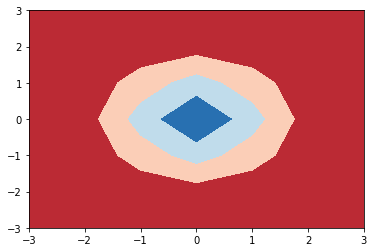

In [7]:
# try plotting contours (stolen, https://matplotlib.org/examples/pylab_examples/contourf_demo.html)
origin = 'lower'
#origin = 'upper'

delta = 1

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
#Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
#Z = 10000 * (Z1 - Z2)

Z = np.ma.array(Z1 * 1000)
print(X)
print(Y)
print(Z)
# mask a circle in the middle:
#interior = np.sqrt((X**2) + (Y**2)) < 0.5
#Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.
CS = plt.contourf(X, Y, Z, 4,
                  cmap='RdBu',
                  origin=origin)

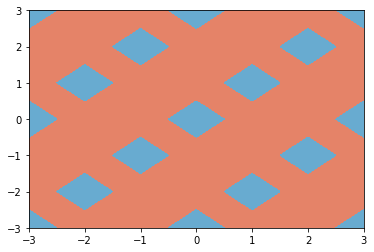

In [8]:
# try and make our own contour plot
origin = 'lower'
delta = 1

def checkerboard(x, y):
    mod = 3
    if (x % 3) == (y % 3):
        return 1
    else:
        return 0

def checkerboard2(x, y):
    if (y % 2 == 0):
        return 1
    
    return 0

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros((len(X), len(X[0])))

# create our own "faux" function
for x in range(len(X)):
    for y in range(len(X[x])):
        Z[x][y] = checkerboard(x, y)

CS = plt.contourf(X, Y, Z, 1,
                  cmap='RdBu',
                  origin=origin)

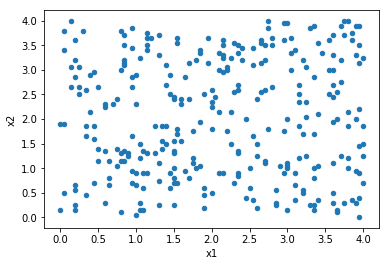

In [21]:
# get back to the project
X_train, X_test, y_train, y_test = train_test_split(df[['x1', 'x2']], df['value'], test_size=0.4, random_state=0)
X1, X2 = np.meshgrid(X_train['x1'], X_train['x2'])
ax = X_train.plot(kind='scatter', x='x1', y='x2')
X, Y = np.meshgrid(X_train['x1'], X_train['x2'])
Z = np.zeros((len(X), len(X[0])))

In [31]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#helpers for plotting
def plot(clf):
    Z = clf.predict(np.c_[X.ravel(), Y.ravel()])
    Z = Z.reshape(X.shape)
    plt.figure()
    plt.pcolormesh(X, Y, Z, cmap=cmap_light)
    plt.scatter(X_train['x1'], X_train['x2'], c=y_train, cmap=cmap_bold)

In [15]:
# try our first SVM
#clf = svm.SVC(kernel='linear', C=.5)
parameters = {'kernel':['linear'], 'C':[0.1, 0.5, 1, 5, 10, 50, 100]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.00246127,  0.00204849,  0.00261537,  0.0038933 ,  0.00197776,
         0.00384172,  0.2611529 ]),
 'mean_score_time': array([ 0.00093095,  0.00068935,  0.00079274,  0.00153383,  0.00049225,
         0.00052706,  0.00059581]),
 'mean_test_score': array([ 0.62,  0.62,  0.62,  0.62,  0.62,  0.62,  0.62]),
 'mean_train_score': array([ 0.62,  0.62,  0.62,  0.62,  0.62,  0.62,  0.62]),
 'param_C': masked_array(data = [0.1 0.5 1 5 10 50 100],
              mask = [False False False False False False False],
        fill_value = ?),
 'param_kernel': masked_array(data = ['linear' 'linear' 'linear' 'linear' 'linear' 'linear' 'linear'],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'C': 0.1, 'kernel': 'linear'},
  {'C': 0.5, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 5, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 50, 'kernel': 'linear'},
  {'C': 100, 'kernel': 'linear'}),
 'ra

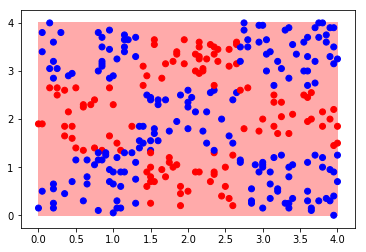

In [32]:
plot(clf)

In [33]:
# SVM with Polynomial Kernel
parameters = {'kernel':['poly'], 'C':[0.1, 1, 3], 'degree':[4,5,6], 'gamma':[0.1,0.5]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([  2.98929214e-03,   3.25189432e-02,   4.85531489e-03,
          4.19424375e-02,   2.33125687e-03,   2.19339927e-01,
          5.78927994e-03,   1.23901685e-01,   5.52487373e-03,
          5.08580605e-01,   3.08124224e-03,   2.65823340e+00,
          7.71307945e-03,   2.73901542e-01,   4.48234876e-03,
          1.32167856e+00,   6.67063395e-03,   1.47087076e+01]),
 'mean_score_time': array([ 0.00072606,  0.00074355,  0.00099413,  0.00062172,  0.00046253,
         0.00064484,  0.00046849,  0.00067226,  0.00048614,  0.00064953,
         0.00047024,  0.00064437,  0.00050465,  0.00067735,  0.00047843,
         0.00074236,  0.00059986,  0.00068283]),
 'mean_test_score': array([ 0.62      ,  0.63      ,  0.62      ,  0.72333333,  0.62      ,
         0.72666667,  0.62      ,  0.7       ,  0.62      ,  0.72666667,
         0.62666667,  0.73      ,  0.62      ,  0.70666667,  0.61333333,
         0.72      ,  0.65666667,  0.73333333]),
 'mean_train_score': array([ 0.62  

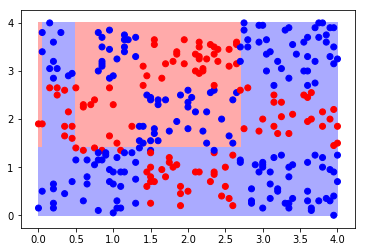

In [34]:
plot(clf)

In [35]:
# hopefully rbf is better
parameters = {'kernel':['rbf'], 'C':[0.1, 0.5, 1, 5, 10, 50, 100], 'gamma':[0.1, 0.5, 1, 3, 6, 10]}
svr = svm.SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.00318718,  0.00279784,  0.00356062,  0.00274237,  0.00258517,
         0.0023272 ,  0.00295488,  0.00363135,  0.00439   ,  0.00175047,
         0.00199699,  0.00220275,  0.00219671,  0.00193095,  0.00173561,
         0.00168578,  0.00187564,  0.0020992 ,  0.00227865,  0.0017813 ,
         0.00153859,  0.00295003,  0.0017616 ,  0.00236464,  0.00223525,
         0.00178234,  0.0016373 ,  0.00177598,  0.00174864,  0.00229534,
         0.00269016,  0.00181309,  0.00176644,  0.00166074,  0.00173529,
         0.00232943,  0.0030063 ,  0.00182652,  0.0018189 ,  0.0017306 ,
         0.00175365,  0.00238268]),
 'mean_score_time': array([ 0.00097028,  0.00129318,  0.00160297,  0.00085799,  0.00083955,
         0.00086172,  0.00094016,  0.00147669,  0.00138529,  0.00062084,
         0.00066574,  0.00070715,  0.0007658 ,  0.0006489 ,  0.00055846,
         0.00056585,  0.00057809,  0.00066058,  0.00071883,  0.00051602,
         0.00049893,  0.000971  ,  0.00050894,  0.00

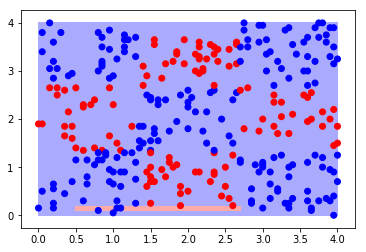

In [36]:
plot(clf)

In [37]:
# hopefully rbf is better
parameters = {'C':[0.1, 0.5, 1, 5, 10, 50, 100]}
logr = linear_model.LogisticRegression()
clf = GridSearchCV(logr, parameters)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.00158699,  0.00144029,  0.00125472,  0.00131853,  0.00215157,
         0.00155632,  0.00193199]),
 'mean_score_time': array([ 0.00053581,  0.00039379,  0.00032536,  0.00036391,  0.00064945,
         0.00046221,  0.00053048]),
 'mean_test_score': array([ 0.61333333,  0.60333333,  0.60333333,  0.60333333,  0.60333333,
         0.60333333,  0.60333333]),
 'mean_train_score': array([ 0.61166667,  0.60833333,  0.60833333,  0.60833333,  0.60833333,
         0.60833333,  0.60833333]),
 'param_C': masked_array(data = [0.1 0.5 1 5 10 50 100],
              mask = [False False False False False False False],
        fill_value = ?),
 'params': ({'C': 0.1},
  {'C': 0.5},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 50},
  {'C': 100}),
 'rank_test_score': array([1, 2, 2, 2, 2, 2, 2], dtype=int32),
 'split0_test_score': array([ 0.62,  0.59,  0.59,  0.59,  0.59,  0.59,  0.59]),
 'split0_train_score': array([ 0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6]),
 'split1_test_score':

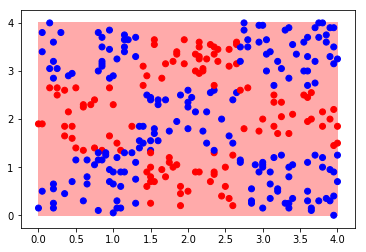

In [38]:
plot(clf)

In [39]:
# hopefully k-nearest neighbors is better
parameters = {'n_neighbors': range(1, 51), 'leaf_size': range(5, 61, 5)}
knn = neighbors.KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.00143353,  0.00109633,  0.00121872,  0.00162594,  0.00114409,
         0.0024817 ,  0.00097569,  0.00099794,  0.00092959,  0.00103045,
         0.00133125,  0.00104451,  0.00145753,  0.00205374,  0.00163364,
         0.00161163,  0.00240207,  0.00091354,  0.00090003,  0.00091211,
         0.00091116,  0.00094668,  0.00091902,  0.00088612,  0.00090822,
         0.00092101,  0.00099285,  0.00103331,  0.0019869 ,  0.00094899,
         0.00104872,  0.00092411,  0.00089558,  0.00090718,  0.00089574,
         0.00096925,  0.00091394,  0.00093977,  0.0009234 ,  0.00090432,
         0.00092443,  0.00093246,  0.0009141 ,  0.00091338,  0.00092483,
         0.00092864,  0.00094144,  0.00093198,  0.00092109,  0.00088048,
         0.00103188,  0.00087357,  0.00089939,  0.00089971,  0.0008932 ,
         0.00089637,  0.00089685,  0.00086172,  0.00088271,  0.00089002,
         0.00088231,  0.00089749,  0.00090448,  0.00086514,  0.00094104,
         0.00092785,  0.00093826, 

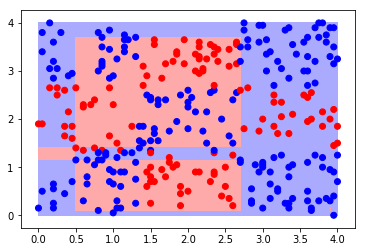

In [40]:
plot(clf)

In [41]:
# Decision Trees
parameters = {'max_depth': range(1, 51), 'min_samples_split': range(2, 11)}
dt = tree.DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.00153844,  0.00156848,  0.00141366,  0.0012699 ,  0.00101471,
         0.00168522,  0.00146842,  0.00105317,  0.00283599,  0.00104197,
         0.00091283,  0.00092308,  0.0009261 ,  0.00090162,  0.00096718,
         0.00090861,  0.00083971,  0.00083447,  0.00102131,  0.00096409,
         0.00090098,  0.00099603,  0.00087627,  0.0010399 ,  0.00089423,
         0.00089471,  0.00098236,  0.00091402,  0.00090043,  0.000892  ,
         0.00092053,  0.00092594,  0.00090639,  0.00096528,  0.00089828,
         0.00100374,  0.00091966,  0.00089812,  0.0009559 ,  0.00090337,
         0.00102425,  0.00097783,  0.00092053,  0.00092785,  0.00111421,
         0.00160209,  0.00097593,  0.00099389,  0.00106406,  0.00119758,
         0.00207305,  0.00179267,  0.00172925,  0.00193993,  0.00175913,
         0.002635  ,  0.00100207,  0.00090543,  0.00090567,  0.00086594,
         0.00087937,  0.00084996,  0.00104507,  0.00089486,  0.00087436,
         0.00088787,  0.00092324, 

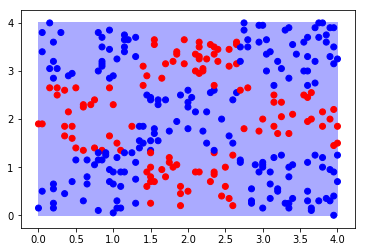

In [42]:
plot(clf)

In [43]:
# Random Forests
parameters = {'max_depth': range(1, 51), 'min_samples_split': range(2, 11)}
dt = ensemble.RandomForestClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train[['x1', 'x2']], y_train)
clf.cv_results_

{'mean_fit_time': array([ 0.01306534,  0.01388415,  0.00976523,  0.00990049,  0.00968583,
         0.00980425,  0.00972764,  0.00988897,  0.00986735,  0.01000595,
         0.01015147,  0.01218875,  0.01833566,  0.00975951,  0.00972406,
         0.00981601,  0.01400121,  0.0098203 ,  0.01002947,  0.0097723 ,
         0.0098002 ,  0.00989135,  0.00992441,  0.01039418,  0.01046697,
         0.01039068,  0.01013088,  0.01045783,  0.01022625,  0.01007056,
         0.01008272,  0.01024946,  0.01004227,  0.00998847,  0.00990645,
         0.00998569,  0.01054366,  0.01059834,  0.01009909,  0.01005904,
         0.00990939,  0.01004616,  0.01013136,  0.00987927,  0.00990677,
         0.01011642,  0.01003106,  0.01024779,  0.01003774,  0.01004195,
         0.00996892,  0.01003305,  0.01083684,  0.01010633,  0.01005522,
         0.01002812,  0.01006428,  0.01011157,  0.00998123,  0.00997861,
         0.01003941,  0.01001104,  0.0100379 ,  0.01015067,  0.0101649 ,
         0.01012484,  0.01001763, 

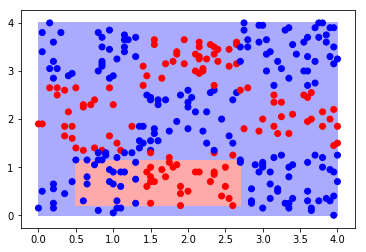

In [44]:
plot(clf)